In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# DATA Understanding 

In [2]:
! ls ../data


column_names.md   kc_house_data.csv


In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

In [4]:
df.shape

(21597, 21)

we have the information of 21597 houses located in King county washington 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see above, dataset has null values in some columns

### Price column

In [7]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

### ID column

duplicate values on 'id' column, some houses show up more than once on dataset

In [8]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [9]:
df.loc[df["id"]==2044500213]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15787,2044500213,6/17/2014,310000.0,4,2.0,1870,6000,1.5,NO,NONE,...,7 Average,1870,0.0,1956,NaN,98125,47.7155,-122.315,1520,7169
15788,2044500213,1/26/2015,449000.0,4,2.0,1870,6000,1.5,NO,NONE,...,7 Average,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169


House appering 2 or more times, has different price changing over time, will consider keeping latest price, or keeping duplicates since they can be trated as sale data points, not houses alone

### Bedrooms

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

house with 33 bedrooms, looked for id number and found out it has only 3 bed rooms, value will be replaced, same for house with 11 rooms, zillow shows it has only 4 rooms.

In [11]:
df.loc[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


### Waterfront column

above we can see on waterfront value, the 3 row has null value, for a NO response

In [12]:
# Whether the house is on a waterfront
#   * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, 
#     Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts

# column has 2353 null values, those might be taken as NO 

#categorical, has some null values
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [13]:
df['waterfront'].isnull().sum()

2376

In [14]:
df['waterfront'].mode()

0    NO
dtype: object

### Date

data set goes back to 2014 and most recent data points are from 2015

In [15]:
# Dates
df['date'].value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
1/31/2015       1
5/24/2015       1
11/30/2014      1
5/17/2014       1
5/27/2015       1
Name: date, Length: 372, dtype: int64

### View

Categorical data

In [16]:
# Quality of view from house
# categorical data
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### Condition

In [17]:
# categorical data
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

### Grade

In [18]:
# categorical data
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### sqft_basement

In [19]:
# numeric data needed to convert from str to int data type
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1913.0        1
1920.0        1
2350.0        1
2300.0        1
556.0         1
Name: sqft_basement, Length: 304, dtype: int64

/




# Data Preparation

Our target

In [20]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [21]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [22]:
df['price'].isna().sum()

0

### Cleaning ID column
will drop duplicate values from id column, keeping most recent record of the house

In [23]:
df.drop_duplicates(subset='id', keep='last', inplace=True)

In [24]:
df.loc[df["id"]==2044500213]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15788,2044500213,1/26/2015,449000.0,4,2.0,1870,6000,1.5,NO,NONE,...,7 Average,1870,0.0,1956,0.0,98125,47.7155,-122.315,1520,7169


In [25]:
df['id'].isna().sum()

0

### cleaning bedroom column

will replace outlier/incorrect values from bedrooms column

In [26]:
df["bedrooms"].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [27]:
df.loc[df["bedrooms"]==33, 'bedrooms'] = 3
df.loc[df["bedrooms"]==11, 'bedrooms'] = 4

In [28]:
df['bedrooms'].isna().sum()

0

### Cleaning Waterfront column

In [29]:
df['waterfront'].value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

will change NaN values to NO since, since it is the most frequent value under that column

In [30]:
df['waterfront'].isnull().sum()

2353

In [31]:
df['waterfront'] = df['waterfront'].replace(np.nan, 'NO')


In [32]:
df['waterfront'].value_counts()[0]+df['waterfront'].value_counts()[1]

21420

In [33]:
df['waterfront'].isna().sum()

0

### Cleaning view column

In [34]:
df['view'].value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [35]:
df['view'].isna().sum()

63

In [36]:
df['view'] = df['view'].replace(np.nan, 'NONE')

In [37]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [38]:
df['view'].isna().sum()

0

### Cleaning sqft_basement column

Will proceed and transform data on sqft_basement column from str to a int type

In [39]:
df['sqft_basement'].value_counts()

0.0       12716
?           452
600.0       216
500.0       206
700.0       206
          ...  
2130.0        1
475.0         1
2250.0        1
1135.0        1
556.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [40]:
df['sqft_basement'].isna().sum()

0

no Nan values,  '?' is a frequent value on the column

In [41]:
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Something I noticed is how  sqft_living value is the total sqft living area in the house + basement, 
and if the basement column shows 0.0 or '?' sqft_living is same as sqft_above, 
so we should consider changing '?' to 0.0, and have a  full numeric column we can work with later on


In [42]:
# Changed all '?' to '0.0'
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0.0'


will change object type data to int

In [43]:
df['sqft_basement'] = df['sqft_basement'].replace(',','.').astype(float)

In [44]:
type(df['sqft_basement'][0])

numpy.float64

# Droping columns
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [45]:
df = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
         'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [46]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


#  Modeling / Exploration

In [47]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
id,1.000000,-0.018450,0.002240,0.004343,-0.013451,-0.132648,0.018139,0.021171
price,-0.018450,1.000000,0.317457,0.525215,0.701295,0.088789,0.254972,0.051012
bedrooms,0.002240,0.317457,1.000000,0.529378,0.594845,0.033782,0.183536,0.161286
bathrooms,0.004343,0.525215,0.529378,1.000000,0.755522,0.087779,0.501803,0.506252
sqft_living,-0.013451,0.701295,0.594845,0.755522,1.000000,0.172586,0.352868,0.316646
sqft_lot,-0.132648,0.088789,0.033782,0.087779,0.172586,1.000000,-0.005561,0.052312
floors,0.018139,0.254972,0.183536,0.501803,0.352868,-0.005561,1.000000,0.488935
yr_built,0.021171,0.051012,0.161286,0.506252,0.316646,0.052312,0.488935,1.000000


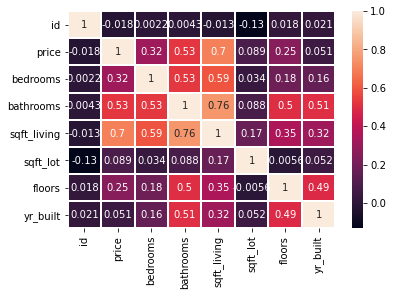

In [48]:
sns.heatmap(df.corr(),linecolor='white',linewidths=1,annot=True)
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


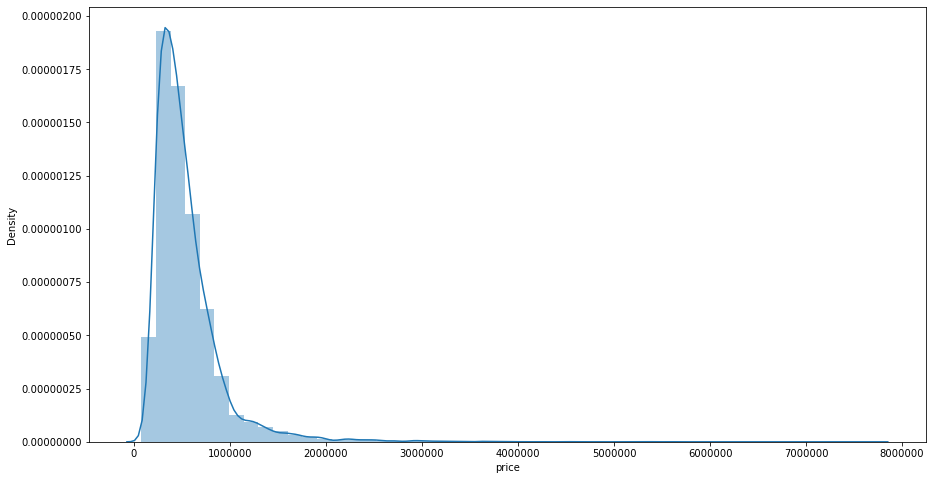

In [49]:
plt.figure(figsize=(15,8))
sns.distplot(df['price'])
plt.ticklabel_format(style='plain');

# working on categorical and discrete columns

- floors
- waterfront
- condition
- grade
- yr_built

# Price and floors

In [50]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

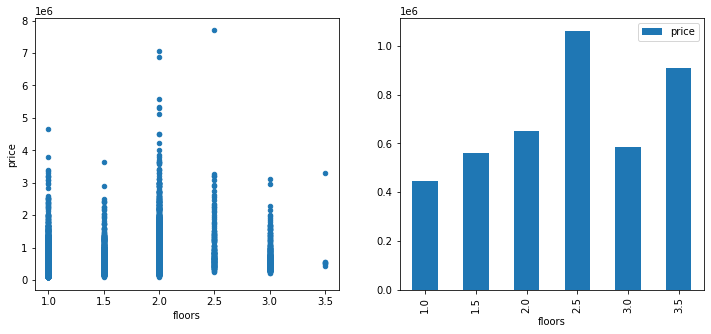

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

df.plot.scatter(x="floors", y="price", ax=ax1)
df.groupby("floors").mean().plot.bar(y="price", ax=ax2);

In [90]:
y = df['price']
x5 = df['floors']

x5_con = sm.add_constant(x5)


model5 = sm.OLS(Y, x5_con).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2248.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:58:07   Log-Likelihood:                -15474.
No. Observations:               21420   AIC:                         3.095e+04
Df Residuals:                   21418   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6051      0.010   1257.057      0.000      12.585      12.625
floors         0.2989      0.006     47.416      0.000       0.287       0.311
==============================================================================
Omnibus:                      873.030   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.150
Skew:                           0.452   Prob(JB):                    1.26e-234
Kurtosis:                       3.624   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

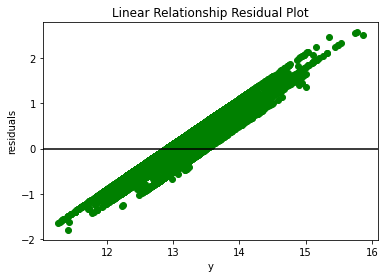

In [92]:
linear_results = model5

fig, ax = plt.subplots()

ax.scatter(Y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### price and  waterfront

In [54]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [55]:
pd.get_dummies(df['waterfront'], drop_first=True)

,YES
0,0
1,0
2,0
3,0
4,0
...,...
21592,0
21593,0
21594,0
21595,0


In [85]:
y = df['price']
x = pd.get_dummies(df['waterfront'], drop_first=True)

x_con = sm.add_constant(x)


model4 = sm.OLS(y, x_con).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1617.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:56:46   Log-Likelihood:            -3.0410e+05
No. Observations:               21420   AIC:                         6.082e+05
Df Residuals:                   21418   BIC:                         6.082e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.338e+05   2430.019    219.667      0.000    5.29e+05    5.39e+05
YES         1.183e+06   2.94e+04     40.206      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    17604.172   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           910817.705
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      34.118   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

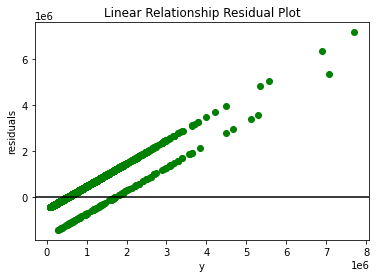

In [88]:
linear_results = model4

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### price vs condition

In [57]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [58]:
y = df['price']
x2 = pd.get_dummies(df['condition'], drop_first=True)

x2_con = sm.add_constant(x2)


model2 = sm.OLS(y, x2_con).fit().summary()
model2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.12
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.77e-29
Time:                        06:50:38   Log-Likelihood:            -3.0481e+05
No. Observations:               21420   AIC:                         6.096e+05
Df Residuals:                   21415   BIC:                         6.097e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.439e+05   3107.692    175.030      0.000    5.38e+05     5.5e+05
Fair       -2.099e+05    2.9e+04     -7.251      0.000   -2.67e+05   -1.53e+05
Good       -2.163e+04   5783.337     -3.740      0.000    -3.3e+04   -1.03e+04
Poor       -1.945e+05   6.93e+04     -2.806      0.005    -3.3e+05   -5.86e+04
Very Good   6.935e+04   9446.298      7.341      0.000    5.08e+04    8.79e+04
==============================================================================
Omnibus:                    19064.760   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1159439.792
Skew:                           4.054   Prob(JB):                         0.00
Kurtosis:                      38.119   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# price and Grade

In [59]:
df['grade'].value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

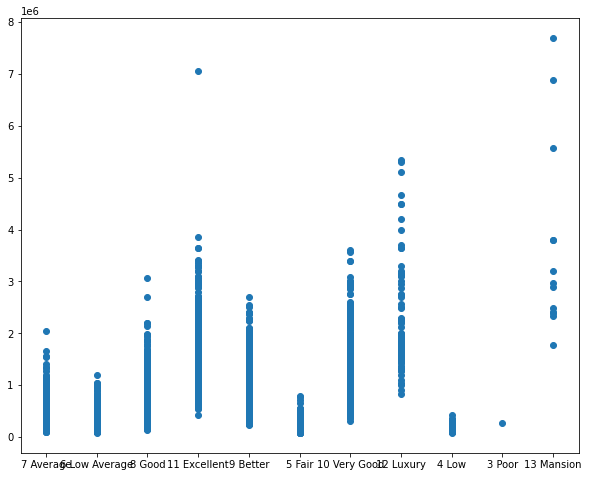

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=df['grade'], y=df["price"]);

the following data points can be considered as noticeable outliers

In [61]:
df.loc[df['grade'] == '3 Poor']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3220,2420069251,262000.0,1,0.75,520,12981,1.0,NO,Very Good,3 Poor,1920


In [62]:
df11 = df.loc[df['grade'] == '11 Excellent']
df11.loc[df11['price'] == df11['price'].max()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3910,9808700762,7060000.0,5,4.5,10040,37325,2.0,YES,Average,11 Excellent,1940


re organizing rows to be in order from 3 poor to 13 mansion

In [63]:
x3 = pd.get_dummies(df['grade'])
x3 = x3[['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better',
         '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']]
x3

,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better,10 Very Good,11 Excellent,12 Luxury,13 Mansion
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,1,0,0,0,0,0
21593,0,0,0,0,0,1,0,0,0,0,0
21594,0,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,1,0,0,0,0,0


In [80]:
Y = np.log(df["price"])

x3_f = x3.drop('7 Average', axis=1)

x3_con = sm.add_constant(x3_f)

model2 = sm.OLS(Y, x3_con).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     2108.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:54:55   Log-Likelihood:                -9201.8
No. Observations:               21420   AIC:                         1.843e+04
Df Residuals:                   21409   BIC:                         1.851e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.8398      0.004   3254.941      0.000      12.832      12.848
3 Poor           -0.3637      0.372     -0.978      0.328      -1.093       0.365
4 Low            -0.6796      0.072     -9.481      0.000      -0.820      -0.539
5 Fair           -0.5055      0.025    -20.522      0.000      -0.554      -0.457
6 Low Average    -0.2863      0.009    -31.074      0.000      -0.304      -0.268
8 Good            0.2973      0.006     47.934      0.000       0.285       0.309
9 Better          0.6476      0.008     78.162      0.000       0.631       0.664
10 Very Good      0.9630      0.012     81.989      0.000       0.940       0.986
11 Excellent      1.2927      0.019     67.676      0.000       1.255       1.330
12 Luxury         1.6806      0.040     42.183      0.000       1.603       1.759
13 Mansion        2.1884      0.103     21.200      0.000       1.986       2.391
==============================================================================
Omnibus:                      124.114   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.814
Skew:                           0.180   Prob(JB):                     2.90e-28
Kurtosis:                       3.111   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 7 Average is the reference category.

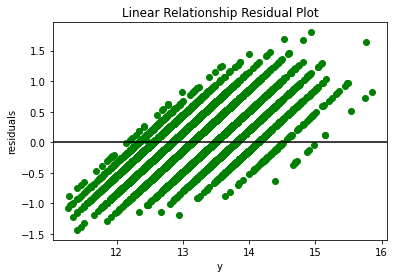

In [95]:
# X = pd.DataFrame()
# X["x1"] = x1
# X["x2"] = x2
# linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = model2

fig, ax = plt.subplots()

ax.scatter(Y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### Price and yr_built

In [65]:
np.corrcoef(df['yr_built'], df['floors'])

array([[1.        , 0.48893469],
       [0.48893469, 1.        ]])

this two share a corraletion for .49, testing result when there together in model against target

In [66]:
len(df['yr_built'].unique())

116

In [96]:
y = df['price']
# x4 = df[['yr_built', 'floors']]
x4 = df['yr_built']
x4_con = sm.add_constant(x4)


model1 = sm.OLS(Y, x4_con).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           7.78e-29
Time:                        07:24:52   Log-Likelihood:                -16481.
No. Observations:               21420   AIC:                         3.297e+04
Df Residuals:                   21418   BIC:                         3.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3811      0.239     43.362      0.000       9.912      10.850
yr_built       0.0014      0.000     11.159      0.000       0.001       0.002
==============================================================================
Omnibus:                      943.502   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1182.983
Skew:                           0.470   Prob(JB):                    1.31e-257
Kurtosis:                       3.664   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

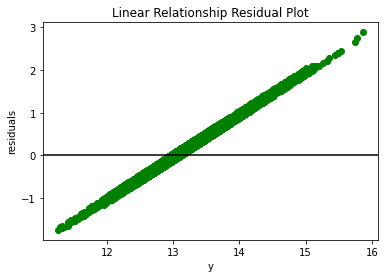

In [97]:
linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = model1

fig, ax = plt.subplots()

ax.scatter(Y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### model with grade, yr built, floors

In [68]:
X = pd.concat([x3_f, df['yr_built'], df['floors']], axis=1)
# X = pd.concat([x3, df['floors']], axis=1)
X

,3 Poor,4 Low,5 Fair,6 Low Average,8 Good,9 Better,10 Very Good,11 Excellent,12 Luxury,13 Mansion,yr_built,floors
0,0,0,0,0,0,0,0,0,0,0,1955,1.0
1,0,0,0,0,0,0,0,0,0,0,1951,2.0
2,0,0,0,1,0,0,0,0,0,0,1933,1.0
3,0,0,0,0,0,0,0,0,0,0,1965,1.0
4,0,0,0,0,1,0,0,0,0,0,1987,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,1,0,0,0,0,0,2009,3.0
21593,0,0,0,0,1,0,0,0,0,0,2014,2.0
21594,0,0,0,0,0,0,0,0,0,0,2009,2.0
21595,0,0,0,0,1,0,0,0,0,0,2004,2.0


In [69]:
X_con = sm.add_constant(X)
# y=df['price']

model = sm.OLS(Y, X_con).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     2394.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:50:38   Log-Likelihood:                -7428.7
No. Observations:               21420   AIC:                         1.488e+04
Df Residuals:                   21407   BIC:                         1.499e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.5127      0.188    130.337      0.000      24.144      24.881
3 Poor           -0.5972      0.342     -1.744      0.081      -1.268       0.074
4 Low            -0.8190      0.066    -12.402      0.000      -0.948      -0.690
5 Fair           -0.6560      0.023    -28.743      0.000      -0.701      -0.611
6 Low Average    -0.3955      0.009    -45.438      0.000      -0.413      -0.378
8 Good            0.3618      0.006     59.573      0.000       0.350       0.374
9 Better          0.7426      0.008     90.311      0.000       0.727       0.759
10 Very Good      1.0608      0.011     93.868      0.000       1.039       1.083
11 Excellent      1.3992      0.018     77.906      0.000       1.364       1.434
12 Luxury         1.7888      0.037     48.529      0.000       1.717       1.861
13 Mansion        2.2017      0.095     23.155      0.000       2.015       2.388
yr_built         -0.0060   9.69e-05    -62.014      0.000      -0.006      -0.006
floors            0.0971      0.005     18.401      0.000       0.087       0.107
==============================================================================
Omnibus:                      117.021   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.820
Skew:                           0.033   Prob(JB):                     3.62e-37
Kurtosis:                       3.428   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model, exog_idx=['3 Poor', '4 Low', '5 Fair', '6 Low Average', '8 Good', 
                                                   '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', 
                                                   '13 Mansion', 'yr_built', 'floors'], fig=fig)

# Customizing plot appearance; note that the StatsModels code actually uses .plot
# with marker 'o', so what looks like a scatter plot is a "line" internally, so
# we access it using .lines rather than .collections
for ax in fig.axes:
    ax.lines[0].set_color("green")
fig.suptitle("Linear Relationship Partial Regression Plot", fontsize="large")

plt.tight_layout()
plt.show()

AttributeError: 'Summary' object has no attribute 'model'

<Figure size 1080x360 with 0 Axes>

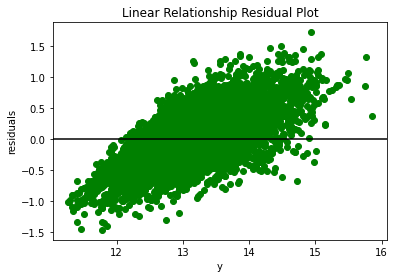

In [73]:
# X7 = pd.DataFrame()
# X7["x1"] = x1
# X7["x2"] = x2
linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = model

fig, ax = plt.subplots()

ax.scatter(Y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

In [71]:
dummy_df = pd.get_dummies(df, drop_first=True)
dummy_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,1.000000,-0.018450,0.002240,0.004343,-0.013451,-0.132648,0.018139,0.021171,-0.003628,-0.011826,...,-0.020212,-0.015130,-0.003900,-0.005133,-0.002921,-0.023680,-0.014505,-0.015624,0.042038,0.008474
price,-0.018450,1.000000,0.317457,0.525215,0.701295,0.088789,0.254972,0.051012,0.264915,-0.049368,...,0.357475,0.292168,0.212466,-0.005203,-0.031883,-0.083324,-0.207182,-0.316700,0.002597,0.234700
bedrooms,0.002240,0.317457,1.000000,0.529378,0.594845,0.033782,0.183536,0.161286,-0.002105,-0.050391,...,0.120563,0.064159,0.040292,-0.017980,-0.070133,-0.114638,-0.246368,-0.112219,0.076695,0.165550
bathrooms,0.004343,0.525215,0.529378,1.000000,0.755522,0.087779,0.501803,0.506252,0.063635,-0.073911,...,0.247678,0.159824,0.095460,-0.012164,-0.055968,-0.137426,-0.364766,-0.316035,0.188422,0.264211
sqft_living,-0.013451,0.701295,0.594845,0.755522,1.000000,0.172586,0.352868,0.316646,0.104737,-0.061956,...,0.345557,0.238121,0.144833,-0.011625,-0.054225,-0.125754,-0.311195,-0.360944,0.069881,0.318132
sqft_lot,-0.132648,0.088789,0.033782,0.087779,0.172586,1.000000,-0.005561,0.052312,0.021429,0.038985,...,0.075682,0.062056,0.007759,-0.000353,0.000416,0.023960,-0.018592,-0.067563,-0.024240,0.049805
floors,0.018139,0.254972,0.183536,0.501803,0.352868,-0.005561,1.000000,0.488935,0.020578,-0.053231,...,0.118776,0.055210,0.021243,-0.006275,-0.030190,-0.079053,-0.229769,-0.309007,0.199931,0.243273
yr_built,0.021171,0.051012,0.161286,0.506252,0.316646,0.052312,0.488935,1.000000,-0.024842,-0.065612,...,0.098337,0.046515,0.004631,-0.011880,-0.042111,-0.128148,-0.312462,-0.212637,0.198446,0.219232
waterfront_YES,-0.003628,0.264915,-0.002105,0.063635,0.104737,0.021429,0.020578,-0.024842,1.000000,-0.000682,...,0.068663,0.083387,-0.002041,-0.000566,-0.002943,0.013128,-0.007025,-0.045589,-0.011570,0.007355
condition_Fair,-0.011826,-0.049368,-0.050391,-0.073911,-0.061956,0.038985,-0.053231,-0.065612,-0.000682,1.000000,...,-0.011981,-0.005607,-0.002151,-0.000596,0.057648,0.058218,0.075857,0.005219,-0.039145,-0.029193


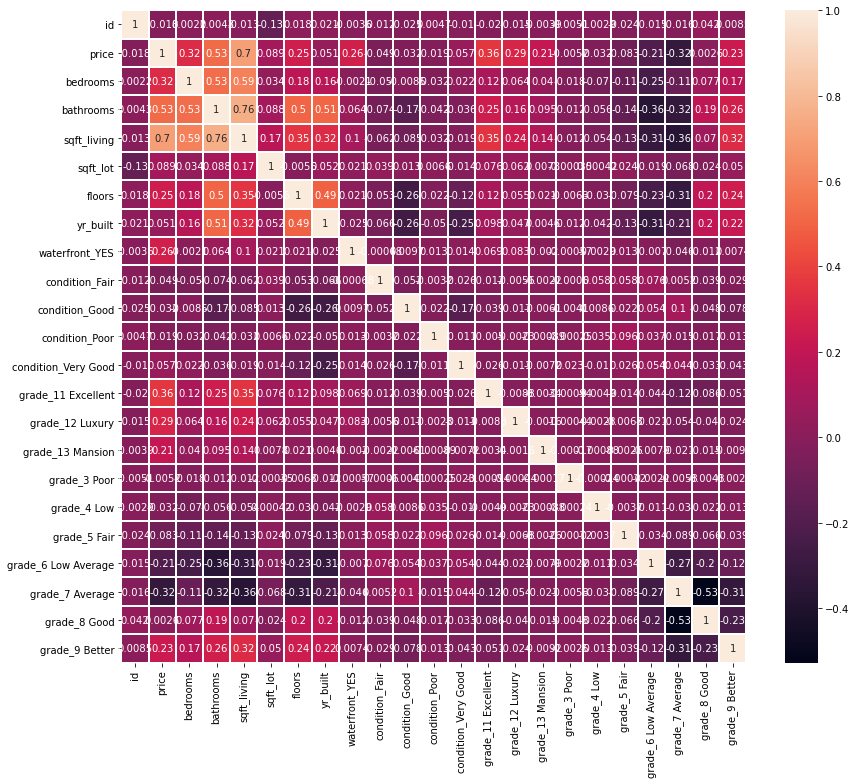

In [72]:
plt.figure(figsize=(14,12))
sns.heatmap(dummy_df.corr(),linecolor='w',linewidths=1,annot=True)
plt.show()